In [12]:


import os
import cv2
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,2)
from matplotlib import pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image


%matplotlib inline



In [2]:


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)



In [3]:


URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   



#### Basic Image Enhancement Using Mathematical Operations

1. Arithmetic Operations like addition, multiplication
2. Thresholding & Masking
3. Bitwise Operations like OR, AND, XOR


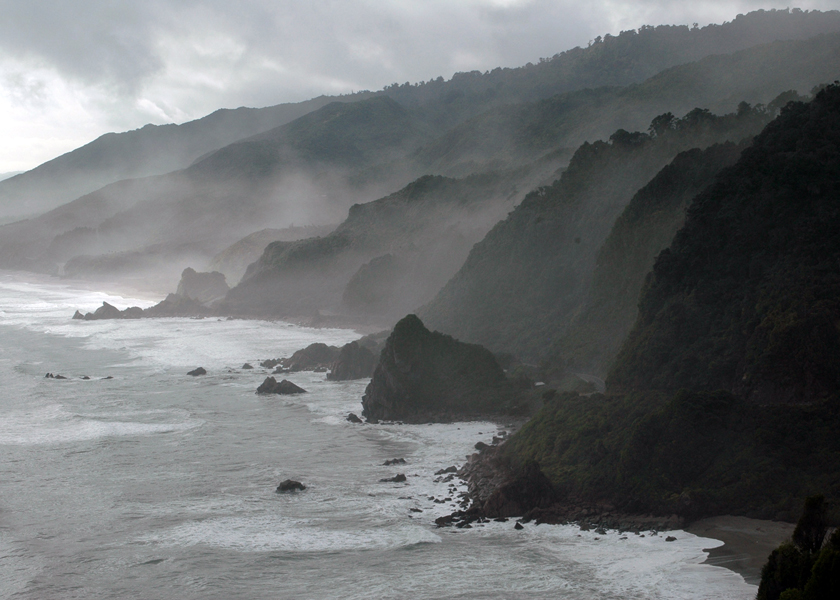

In [5]:
Image(filename='New_Zealand_Coast.jpg')

In [6]:
NewZealand_bgr = cv2.imread('New_Zealand_Coast.jpg', 1)
NewZealand_rbg = cv2.cvtColor(NewZealand_bgr, cv2.COLOR_BGR2RGB)


#### Additon or Brightness
1. np.ones creates an array/matrix filled with ones

##### syntax
np.ones(img_rgb.shape, dtype="uint8")

1. This creates a matrix the same shape as img_rgb (e.g., same height, width, and number of channels if it's a color image) with each element set to 1.
2. The dtype="uint8" ensures each value is an 8-bit unsigned integer, which is the typical data type for image processing (range: 0 to 255).

Ideally, we are creating an image matrix with similar size with our newzealand image. We then add it to newzealand matrix to alter its properties.

In [9]:
matrix = np.ones(NewZealand_rbg.shape, dtype='uint8')
print(matrix) 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [10]:
matrix  = matrix * 50
print(matrix)

[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ...

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]]


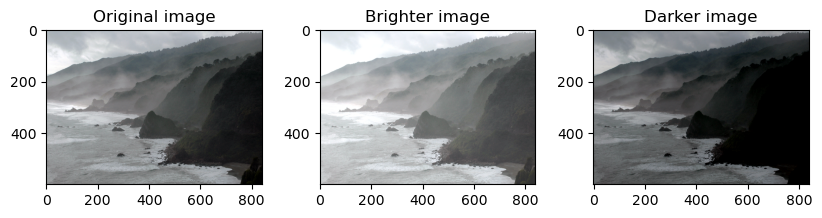

In [18]:
NewZealand_rbg_brighter = cv2.add(NewZealand_rbg, matrix)
NewZealand_rbg_darker = cv2.subtract(NewZealand_rbg, matrix)

plt.subplot(131);plt.imshow(NewZealand_rbg);plt.title('Original image')
plt.subplot(132);plt.imshow(NewZealand_rbg_brighter);plt.title('Brighter image')
plt.subplot(133);plt.imshow(NewZealand_rbg_darker);plt.title('Darker image')
plt.show()

#### Multiplication or Contrast

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

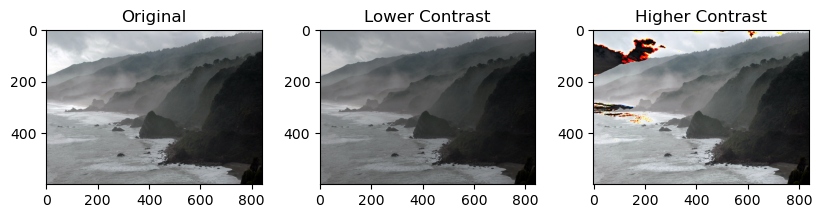

In [20]:
matrix1 = np.ones(NewZealand_rbg.shape) * 0.8
matrix2 = np.ones(NewZealand_rbg.shape) * 1.2
#If dtype is not specified, it will be taken as float64

NewZealand_rbg_darker = cv2.multiply(np.float64(NewZealand_rbg), matrix1)
NewZealand_rbg_darker = np.uint8(NewZealand_rbg_darker) #convert back to uint8

NewZealand_rbg_brighter = cv2.multiply(np.float64(NewZealand_rbg), matrix2)
NewZealand_rbg_brighter = np.uint8(NewZealand_rbg_brighter) #convert back to uint8


plt.subplot(131); plt.imshow(NewZealand_rbg);plt.title("Original")
plt.subplot(132); plt.imshow(NewZealand_rbg_darker);plt.title("Lower Contrast")
plt.subplot(133); plt.imshow(NewZealand_rbg_brighter);plt.title("Higher Contrast")
plt.show()


What happened?

Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

We use `np.clip()`


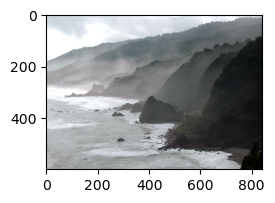

In [22]:
NewZealand_rbg_brighter = cv2.multiply(np.float64(NewZealand_rbg), matrix2)
NewZealand_rbg_brighter = np.clip(NewZealand_rbg_brighter, 0, 255)
NewZealand_rbg_brighter = np.uint8(NewZealand_rbg_brighter)
plt.imshow(NewZealand_rbg_brighter);plt.show()

#### contrast change using alpha channel
Load the image imread -1

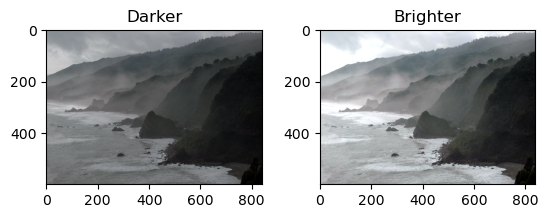

In [23]:
NewZealand_Alpha_bgr = cv2.imread('New_Zealand_Coast.jpg', -1)
NewZealand_Alpha_rbg = cv2.cvtColor(NewZealand_Alpha_bgr, cv2.COLOR_BGR2RGB)

Alpha_darker = cv2.convertScaleAbs(NewZealand_Alpha_rbg, alpha = 0.8)
Alpha_brighter = cv2.convertScaleAbs(NewZealand_Alpha_rbg, alpha = 1.2)

plt.subplot(131); plt.imshow(Alpha_darker);plt.title('Darker')
plt.subplot(132); plt.imshow(Alpha_brighter);plt.title('Brighter')
plt.show()


#### Image Thresholding

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

An `image mask` is a binary or grayscale image used to highlight or isolate specific parts of an image while ignoring others. 

1. cv2.threshold()

    Global Thresholding: This function applies a single, fixed threshold value across the entire image. You provide a threshold value (e.g., 127), and OpenCV will classify every pixel in the image as either below or above this value.
    1. Use Case: Suitable when lighting is consistent throughout the image.

2. cv2.adaptiveThreshold()

    Local Thresholding: This function calculates the threshold for each pixel individually based on a small neighborhood around it. Instead of one global threshold, each pixel gets its threshold based on the local context.
    1. Use Case: Ideal for images with uneven lighting or shadows, as it adapts to local variations in brightness.

##### Global Threshold

retval, dst = cv2.threshold( src, thresh, maxval, type[, dst])
1. src - input array
2. Thresh - value
3. maxval - maxvalue to use with the THRESH_BINARY and THRESH_BINARY_INV
4. type - thresh type

The output array of the same size and type and the same number of channels as src.

dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )

dst Destination image of the same size and the same type as src.

The function has 6 required arguments:

1. src: Source 8-bit single-channel image.(grayscale)

2. maxValue: Non-zero value assigned to the pixels for which the condition is satisfied

3. adaptiveMethod: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.Two Adaptive Methods:

    1. Mean of Neighborhood: Threshold for each pixel is the mean of pixel values in its neighborhood minus a constant.
    2. Gaussian Weighted Sum: Threshold is a weighted sum (Gaussian) of pixel values in the neighborhood, also minus a constant.

4. thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5. blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6. C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.


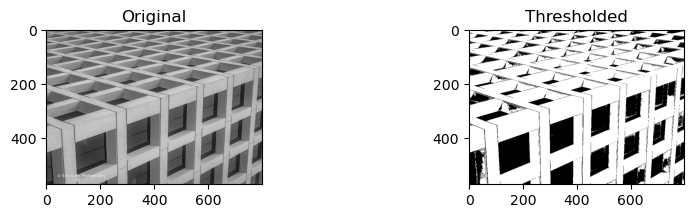

(572, 800)


In [26]:
building_windows = cv2.imread('building-windows.jpg', 0)

src = building_windows
threshold = 100
maxval = 255
type = cv2.THRESH_BINARY

retval, img_thresh = cv2.threshold(src, threshold, maxval, type)
plt.subplot(121);plt.imshow(building_windows, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")
plt.show()
print(img_thresh.shape)


Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

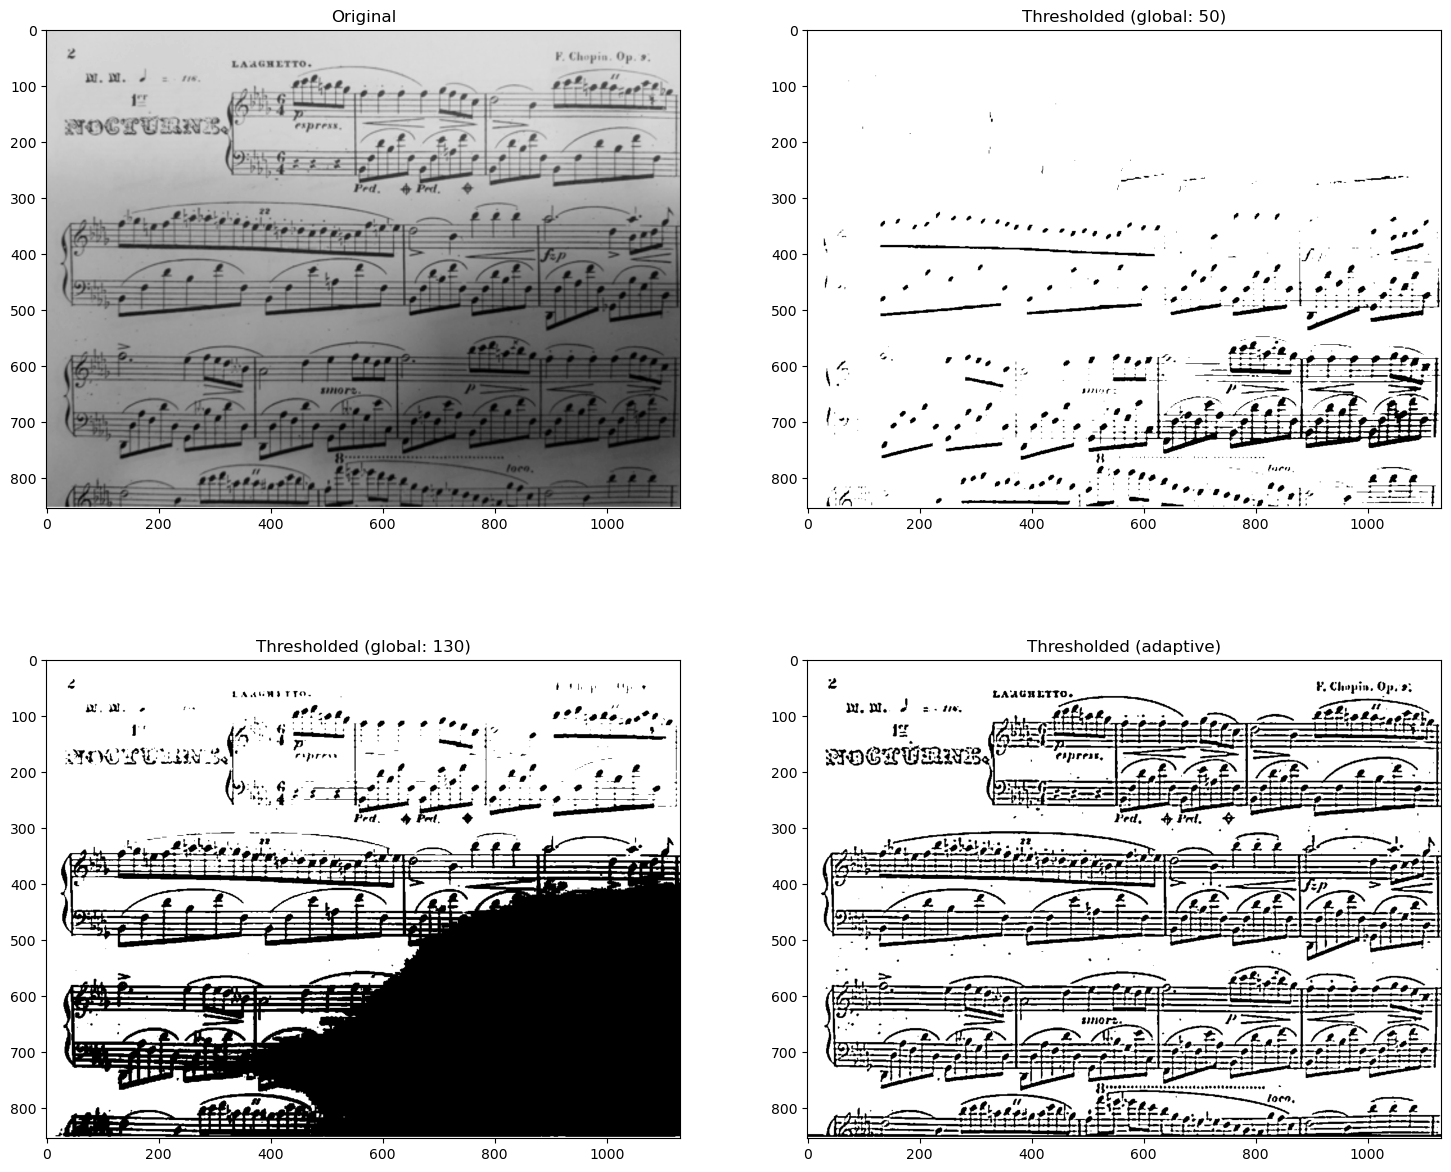

In [28]:
PianoSheet = cv2.imread('Piano_Sheet_Music.png', 0)
# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(PianoSheet, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(PianoSheet, 130, 255, cv2.THRESH_BINARY)
# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(PianoSheet, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(PianoSheet,        cmap="gray");  plt.title("Original")
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)")
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)")
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)")
plt.show()

#### Bitwise Operation
1. cvt.bitwise_and,or,xor,not()
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
The function has 2 required arguments:

1. src1: first input array or a scalar.
2. src2: second input array or a scalar.
3. mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


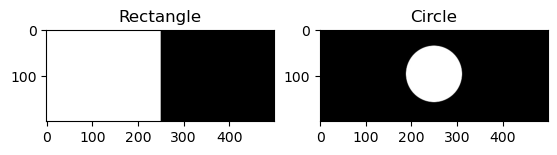

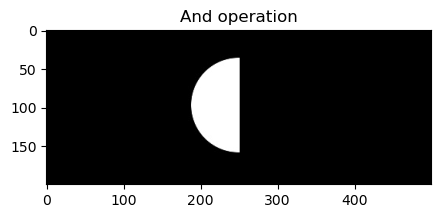

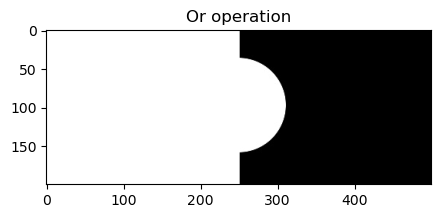

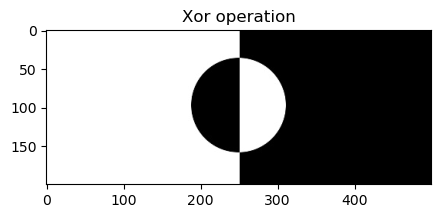

In [35]:
img_rec = cv2.imread('rectangle.jpg', 0)
img_circ = cv2.imread('circle.jpg',0)

plt.figure(figsize=[10,2])
plt.subplot(131);plt.imshow(img_rec, cmap='gray');plt.title('Rectangle')
plt.subplot(132);plt.imshow(img_circ, cmap='gray');plt.title('Circle')
plt.show()

'''AND'''

retval = cv2.bitwise_and(img_rec, img_circ, mask=None)
plt.imshow(retval, cmap='gray');plt.title('And operation');plt.show()

'''OR'''
retval = cv2.bitwise_or(img_rec, img_circ, mask=None)
plt.imshow(retval, cmap = 'grey');plt.title('Or operation');plt.show()

'''XOR'''
retval = cv2.bitwise_xor(img_rec, img_circ, mask=None)
plt.imshow(retval, cmap='gray');plt.title('Xor operation');plt.show()

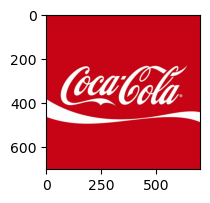

In [ ]:
cocacola_bgr = cv2.imread('coca-cola-logo.png')
cocacola_rgb = cv2.cvtColor(cocacola_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(cocacola_rgb);plt.show()

In [44]:
logo_w = cocacola_rgb.shape[0] #Height
logo_h = cocacola_rgb.shape[1] #width

checkerboard  = cv2.imread('checkerboard_color.png')
checkerboard_rgb = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)

print(f'Size of checkerboard {checkerboard_rgb.shape} \nCocacola size is {cocacola_rgb.shape} ')
print('We need to resize to ensure that the logo fits the checkerboard')
aspect_ratio = logo_w / checkerboard_rgb.shape[1]

Size of checkerboard (1800, 1800, 3) 
Cocacola size is (700, 700, 3) 
We need to resize to ensure that the logo fits the checkerboard


resize_cropped_image  = cv2.resize(cropped_New_Zealand, dsize = dim, interpolation= cv2.INTER_AREA)
1. desired_width = 100
2. desired_height = 200
3. dim = (desired_width, desired_height)

In [41]:

dim = (logo_w, int(checkerboard_rgb.shape[0] * aspect_ratio))
# Resize background image to sae size as logo image
checkerboard_rgb_resize = cv2.resize(checkerboard_rgb, dim, interpolation=cv2.INTER_AREA)

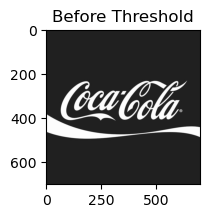

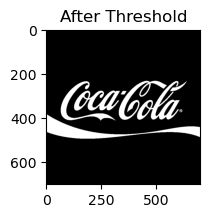

(700, 700)


In [49]:
cocacola_gray = cv2.cvtColor(cocacola_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(cocacola_gray, cmap='gray');plt.title('Before Threshold');plt.show()

threshold = 127
retval, img_mask = cv2.threshold(cocacola_gray, threshold, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray");plt.title('After Threshold');plt.show()
print(img_mask.shape)

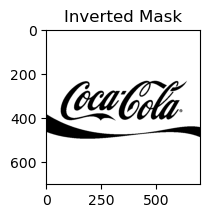

In [50]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray");plt.title('Inverted Mask');plt.show()

result = cv2.bitwise_and(src1, src2, mask=mask)

In cv2.bitwise_and(), writing checkerboard_rgb_resize twice in this case means we're applying a mask on the same image, not combining two different images. Here’s why this duplication is required:

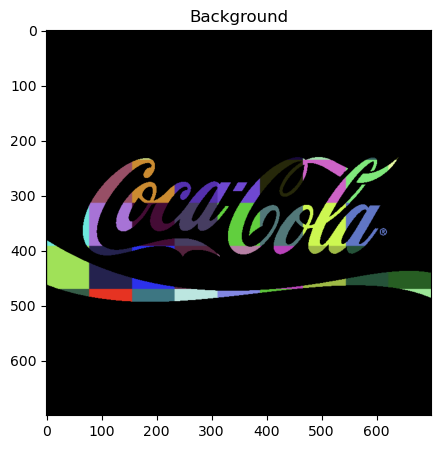

In [53]:
img_background = cv2.bitwise_and(checkerboard_rgb_resize, checkerboard_rgb_resize, mask=img_mask)
plt.figure(figsize=[18,5])
plt.imshow(img_background);plt.title('Background');plt.show()

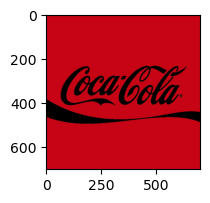

In [54]:
img_foreground = cv2.bitwise_and(cocacola_rgb, cocacola_rgb, mask=img_mask_inv)
plt.imshow(img_foreground);plt.show()

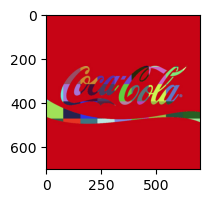

In [ ]:


# Add the two previous results obtain the final result
result = cv2.add(img_background, img_foreground)
plt.imshow(result);plt.show()
cv2.imwrite("logo_final.png", result[:, :, ::-1])



# Summary


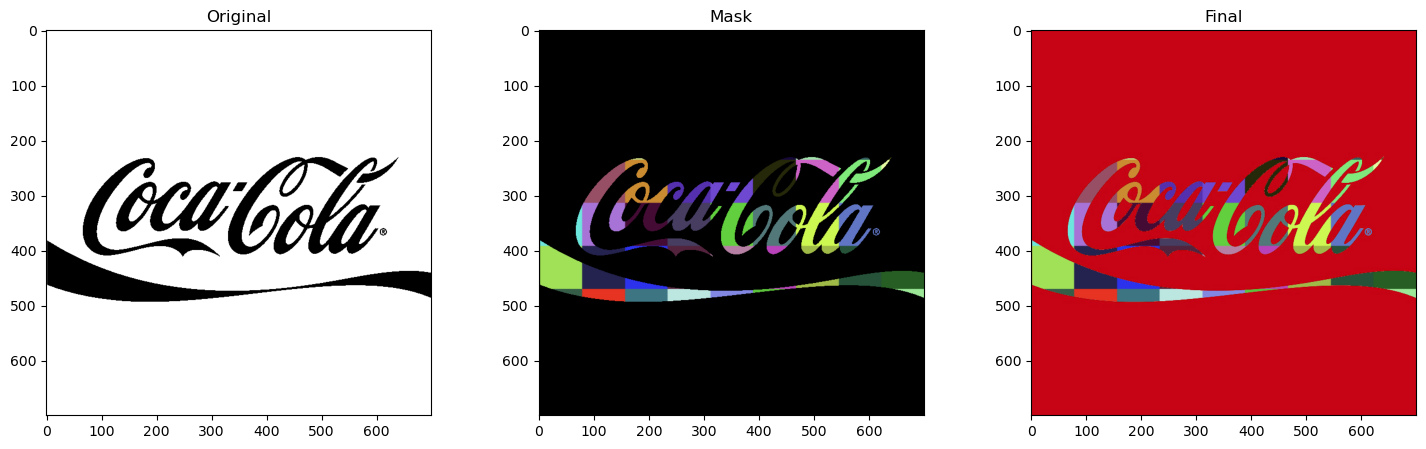

In [65]:
cocacola = cv2.imread('coca-cola-logo.png', -1)
matrix1 = np.ones(cocacola.shape) * 0.8
cocacola_darker = np.uint8(cv2.multiply(np.float64(cocacola), matrix1))
cocacola_rgb = cocacola[:,:,::-1]

logo_w = cocacola_rgb.shape[0] 
logo_h = cocacola_rgb.shape[1]

checkerboard  = cv2.imread('checkerboard_color.png')
checkerboard_rgb = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / checkerboard_rgb.shape[1]
dim = (logo_w, int(checkerboard_rgb.shape[0] * aspect_ratio))
checkerboard_rgb_resize = cv2.resize(checkerboard_rgb, dim, interpolation=cv2.INTER_AREA)

cocacola_gray = cv2.cvtColor(cocacola_rgb, cv2.COLOR_RGB2GRAY)
threshold = 127
retval, img_mask = cv2.threshold(cocacola_gray, threshold, 255, cv2.THRESH_BINARY)

img_background = cv2.bitwise_and(checkerboard_rgb_resize, checkerboard_rgb_resize, mask=img_mask)
img_foreground = cv2.bitwise_and(cocacola_rgb, cocacola_rgb, mask=img_mask_inv)
result = cv2.add(img_background, img_foreground)

plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_mask_inv, cmap='gray');plt.title('Original')
plt.subplot(132);plt.imshow(img_background, cmap='gray');plt.title('Mask')
plt.subplot(133);plt.imshow(result);plt.title('Final')
plt.show()